# Analiza danych z wizualizacją (storytelling)
#### Wojciech Ogiegło

Zbiór danych, który wybrałem do wizualizacji to popularny zbiór zawierający informacje o katastrofie Titanica. 

## Wstęp

Budowa statku Titanic została zakończona w 1911 roku. Został on słusznie okrzyknięty mianem największego oraz najwspanialszego statku pasażerskiego świata. Titanic był bardzo szybkim jak na tamte czasy statkiem, płynął z prędkością maksymalną 22 węzłów, czyli około 40 km/h. Został zaprojektowany w taki sposób, aby pobić rekord przepłynięcia Atlantyku. W nocy z 14 na 15 kwietnia 1912 roku, podczas swojego dziewiczego rejsu na trasie Southampton-Cherbourg-Queenstown-Nowy Jork, RMS Titanic zderzył się z górą lodową i zatonął.

## Analiza danych i storytelling

Najbardziej interesujące z punktu widzenia analizy danych są informacje kto miał największe szanse na przeżycie słynnej katastrofy. Postaram się to objaśnić w pracy.

Na samym początku analizy należy wczytać wszystkie potrzebne biblioteki.

In [1]:
import numpy as np
import pandas as pd
import math
import ipywidgets as widgets
import matplotlib.pyplot as plt
import seaborn as sns

Następnie należy wczytać zbiór danych.

In [2]:
data = pd.read_csv('Titanic.csv', sep=',')

W celu zapoznania się ze zbiorem danych zostały wyświetlone podstawowe informacje o zbiorze danych:

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


A także kilka pierwszych rekordów:

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Jak widać, zbiór danych składa się z 891 instancji oraz 11 zmiennych. Zmienne przedstawiają się następująco:

* PassengerId - Identyfikator pasażera
* Survived - Informacja czy pasażer przeżył katastrofe, 0 - nie przeżył, 1 - przeżył
* Pclass - Klasa biletu pasażera, 1, 2 oraz 3 klasa
* Name - Imię i nazwisko pasażera
* Sex - Płeć pasażera
* Age - Wiek w latach
* SibSp - Liczba pasażerów w postaci rodzeństwa lub męża/żony, z którymi pasażer podróżował
* Parch - Liczba pasażerów w postaci rodziców lub dzieci, z którymi pasażer podróżował. Niektóre dzieci podróżowały z nianią - w tym przypadku zmienna przyjmuje wartość 0
* Ticket - Identyfikator biletu
* Fare - Opłata za bilet
* Cabin - Numer kabiny
* Embarked - Port, na którym wsiadał, C - Cherbourg, Q - Queenstown, S - Southampton

W związku z tym, że istnieje kilka nieścisłości w danych należy coś z nimi zrobić, czyli przeprowadzić tzw. preprocessing, do którego zalicza się takie rzeczy jak:
* usunięcie niepotrzebnych kolumn do analizy,
* usunięcie brakujących wartości,
* zaokrąglenie wartości zmiennych żeby uzyskać je w postaci całkowitej,
* połączenie wartości z kolumn w jedną dodatkową kolumnę.

Wszystkie wspomniane rzeczy zostały przedstawione poniżej.

Na początek wziąłem pod uwagę usunięcie niepotrzebnych kolumn do analizy - oznacza to, że zmienne te są nieinformatywne, w związku z czym nie ma sensu ich trzymać w zbiorze danych.

In [5]:
data = data.drop(['Ticket', 'Cabin', 'Name'], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


Jak widać powyzej, niepotrzebne zmienne zostały usunięte.

Teraz przechodzimy do usunięcia brakujących wartości, w przypadku zmiennej ,,Age'' uzupełnimy je średnią wartością, a w przypadku ,,Embarked'' usuniemy dwa wiersze posiadające wspomniane brakujące wartości.

In [6]:
data['Age'] = data['Age'].fillna(data['Age'].mean())
data = data[data['Embarked'].notna()]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    object 
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 69.5+ KB


Kolejną rzeczą, którą trzeba wykonać to zaokrąglenie wartości zmiennych - w przypadku zmiennej ,,Age'' czy ,,Fare'' mamy informacje, że są one zapisane w postaci zmiennoprzecinkowej, należy je zaokrąglić aby uzyskać je w postaci liczb całkowitych.

In [7]:
data['Age'] = data['Age'].apply(math.ceil)
data['Fare'] = data['Fare'].apply(math.ceil)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  889 non-null    int64 
 1   Survived     889 non-null    int64 
 2   Pclass       889 non-null    int64 
 3   Sex          889 non-null    object
 4   Age          889 non-null    int64 
 5   SibSp        889 non-null    int64 
 6   Parch        889 non-null    int64 
 7   Fare         889 non-null    int64 
 8   Embarked     889 non-null    object
dtypes: int64(7), object(2)
memory usage: 69.5+ KB


Ostatnią rzeczą, która przyda się w analizie jest zoptymalizowanie liczby osób, z którymi pasażer podróżował. Biorąc pod uwagę, że w zmiennej ,,SibSp'' przechowywana jest liczba współpasażerów w postaci rodzeństwa lub męża/żony, a w zmiennej ,,Parch'' liczba współpasażerów w postaci rodziców lub dzieci to można połączyć wartości tych dwóch zmiennych w jedną jako sumę współpasażerów danej osoby. 

In [8]:
familySize = pd.DataFrame(data.apply(lambda x: x.SibSp+x.Parch, axis=1), columns=["FamilySize"])
data = data.join(familySize)
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
0,1,0,3,male,22,1,0,8,S,1
1,2,1,1,female,38,1,0,72,C,1
2,3,1,3,female,26,0,0,8,S,0
3,4,1,1,female,35,1,0,54,S,1
4,5,0,3,male,35,0,0,9,S,0


Po wykonaniu wszystkich czynności związanych z przygotowaniem danych, mogę je przedstawić w formie interaktywnej. Poniżej zostały napisane funkcje, które są wykorzystane do przedstawienia danych w formie interaktywnej - każdy może sobie wybierać wartości do filtrowania danych.

Oprócz przedstawienia zmiennych, zostały również stworzone dwie dodatkowe zmienne ,,survived'' oraz ,,non_survived'' - przechowujące informacje o pasażerach, którzy przeżyli oraz takich, którym się to nie udało.

#### Interaktywna forma przedstawienia danych

In [9]:
survived = data[data.Survived == 1]
non_survived = data[data.Survived == 0]

ALL = 'Wszystkie'
def unique_sorted_values_plus_ALL(array):
    unique = array.unique().tolist()
    unique.sort()
    unique.insert(0, ALL)
    return unique

dropdown_survived = widgets.Dropdown(
    options = unique_sorted_values_plus_ALL(data.Survived), 
    description="Przeżycie")
dropdown_p_class = widgets.Dropdown(
    options = unique_sorted_values_plus_ALL(data.Pclass), 
    description="Klasa biletu")
dropdown_sex = widgets.Dropdown(
    options = unique_sorted_values_plus_ALL(data.Sex), 
    description="Płeć")
dropdown_age = widgets.Dropdown(
    options = unique_sorted_values_plus_ALL(data.Age), 
    description="Wiek")
dropdown_family_size = widgets.Dropdown(
    options = unique_sorted_values_plus_ALL(data.FamilySize), 
    description="Współpasażerowie")

output = widgets.Output()

def common_filtering(survived, p_class, sex, age, family_size):
    output.clear_output()
    
    if (survived == ALL) & (p_class == ALL) & (sex == ALL) &(age == ALL) & (family_size == ALL):
        common_filter = data
    elif (survived == ALL) & (p_class == ALL) & (sex ==ALL) & (age == ALL):
        common_filter = data[data.FamilySize == family_size]
    elif (survived == ALL) & (p_class == ALL) & (sex == ALL) & (family_size == ALL):
        common_filter = data[data.Age == age]
    elif (survived == ALL) & (sex == ALL) & (age == ALL) & (family_size == ALL):
        common_filter = data[data.Pclass == p_class]
    elif (survived == ALL) & (p_class == ALL) & (age == ALL) & (family_size == ALL):
        common_filter = data[data.Sex == sex]
    elif (survived == ALL) & (p_class == ALL) & (sex == ALL):
        common_filter = data[(data.Age == age) &
                             (data.FamilySize == family_size)]
    elif (survived == ALL) & (p_class == ALL) & (age == ALL):
        common_filter = data[(data.Sex == sex) &
                             (data.FamilySize == family_size)]
    elif (survived == ALL) & (p_class == ALL) & (family_size == ALL):
        common_filter = data[(data.Sex == sex) &
                             (data.Age == age)]
    elif (survived == ALL) & (sex == ALL) & (age == ALL):
        common_filter = data[(data.Pclass == p_class) &
                             (data.FamilySize == family_size)]
    elif (survived == ALL) & (sex == ALL) & (family_size == ALL):
        common_filter = data[(data.Pclass == p_class) &
                             (data.Age == age)]
    elif (survived == ALL) & (age == ALL) & (family_size == ALL):
        common_filter = data[(data.Pclass == p_class) &
                             (data.Sex == sex)]
    elif (survived == ALL) & (p_class == ALL):
        common_filter = data[(data.Sex == sex) &
                             (data.Age == age) & 
                             (data.FamilySize == family_size)]
    elif (survived == ALL) & (sex == ALL):
        common_filter = data[(data.Pclass == p_class) &
                             (data.Age == age) & 
                             (data.FamilySize == family_size)]
    elif (survived == ALL) & (age == ALL):
        common_filter = data[(data.Pclass == p_class) &
                             (data.Sex == sex) & 
                             (data.FamilySize == family_size)]
    elif (survived == ALL) & (family_size == ALL):
        common_filter = data[(data.Sex == sex) &
                             (data.Age == age) &
                             (data.Pclass == p_class)]
    elif (survived == ALL):
        common_filter = data[(data.Pclass == p_class) & 
                             (data.Sex == sex) &
                             (data.Age == age) &
                             (data.FamilySize == family_size)]
    elif (p_class == ALL) & (sex == ALL) & (age == ALL) & (family_size == ALL):
        common_filter = data[data.Survived == survived]
    elif (p_class == ALL) & (age == ALL) & (family_size == ALL):
        common_filter = data[(data.Survived == survived) & 
                             (data.Sex == sex)]
    elif (p_class == ALL) & (sex == ALL) & (family_size == ALL):
        common_filter = data[(data.Survived == survived) & 
                             (data.Age == age)]
    elif (p_class == ALL) & (sex == ALL) & (age == ALL):
        common_filter = data[(data.Survived == survived) & 
                             (data.FamilySize == family_size)]
    elif (p_class == ALL) & (age == ALL):
        common_filter = data[(data.Survived == survived) & 
                             (data.Sex == sex) &
                             (data.FamilySize == family_size)]
    elif (p_class == ALL) & (family_size == ALL):
        common_filter = data[(data.Survived == survived) & 
                             (data.Sex == sex) &
                             (data.Age == age)]
    elif (p_class == ALL):
        common_filter = data[(data.Survived == survived) & 
                             (data.Sex == sex) &
                             (data.Age == age) & 
                             (data.FamilySize == family_size)]
    elif (sex == ALL) & (age == ALL) & (family_size == ALL):
        common_filter = data[(data.Survived == survived) & 
                             (data.Pclass == p_class)]
    elif (sex == ALL) & (age == ALL):
        common_filter = data[(data.Survived == survived) & 
                             (data.Pclass == p_class) & 
                             (data.FamilySize == family_size)]
    elif (sex == ALL) & (family_size == ALL):
        common_filter = data[(data.Survived == survived) & 
                             (data.Pclass == p_class) & 
                             (data.Age == age)]
    elif (age == ALL) & (family_size == ALL):
        common_filter = data[(data.Survived == survived) & 
                             (data.Sex == sex) &
                             (data.Pclass == p_class)]
    elif (age == ALL):
        common_filter = data[(data.Survived == survived) &
                             (data.Pclass == p_class) & 
                             (data.Sex == sex) &
                             (data.FamilySize == family_size)]
    elif (family_size == ALL):
        common_filter = data[(data.Survived == survived) &
                             (data.Pclass == p_class) & 
                             (data.Sex == sex) & 
                             (data.Age == age)]
    elif (sex == ALL):
        common_filter = data[(data.Survived == survived) &
                             (data.Pclass == p_class) & 
                             (data.Age == age) & 
                             (data.FamilySize == family_size)]
    else:
        common_filter = data[(data.Survived == survived) & 
                             (data.Pclass == p_class) &
                             (data.Sex == sex) &
                             (data.Age == age) &
                             (data.FamilySize == family_size)]
    
    with output:
        display(common_filter)
        
with output:
    display(common_filtering(ALL, ALL, ALL, ALL, ALL))
        
def dropdown_survived_eventhandler(change):
    common_filtering(
        change.new, 
        dropdown_p_class.value,
        dropdown_sex.value,
        dropdown_age.value, 
        dropdown_family_size.value)
def dropdown_p_class_eventhandler(change):
    common_filtering(
        dropdown_survived.value, 
        change.new,
        dropdown_sex.value,
        dropdown_age.value, 
        dropdown_family_size.value)
def dropdown_sex_eventhandler(change):
    common_filtering(
        dropdown_survived.value, 
        dropdown_p_class.value, 
        change.new,
        dropdown_age.value, 
        dropdown_family_size.value)
def dropdown_age_eventhandler(change):
    common_filtering(
        dropdown_survived.value, 
        dropdown_p_class.value,
        dropdown_sex.value,
        change.new, 
        dropdown_family_size.value)
def dropdown_family_size_eventhandler(change):
    common_filtering(
        dropdown_survived.value, 
        dropdown_p_class.value, 
        dropdown_sex.value,
        dropdown_age.value, 
        change.new)

dropdown_survived.observe(dropdown_survived_eventhandler, names='value')
dropdown_p_class.observe(dropdown_p_class_eventhandler, names='value')
dropdown_sex.observe(dropdown_sex_eventhandler, names='value')
dropdown_age.observe(dropdown_age_eventhandler, names='value')
dropdown_family_size.observe(dropdown_family_size_eventhandler, names='value')

display(dropdown_survived)
display(dropdown_p_class)
display(dropdown_sex)
display(dropdown_age)
display(dropdown_family_size)

Dropdown(description='Przeżycie', options=('Wszystkie', 0, 1), value='Wszystkie')

Dropdown(description='Klasa biletu', options=('Wszystkie', 1, 2, 3), value='Wszystkie')

Dropdown(description='Płeć', options=('Wszystkie', 'female', 'male'), value='Wszystkie')

Dropdown(description='Wiek', options=('Wszystkie', 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, …

Dropdown(description='Współpasażerowie', options=('Wszystkie', 0, 1, 2, 3, 4, 5, 6, 7, 10), value='Wszystkie')

In [10]:
display(output)

Output(outputs=({'output_type': 'display_data', 'data': {'text/plain': '     PassengerId  Survived  Pclass    …

Przejdźmy już do analizy oraz storytellingu. Na początku przedstawiony został wykres słupkowy pokazujący współczynnik przeżycia.

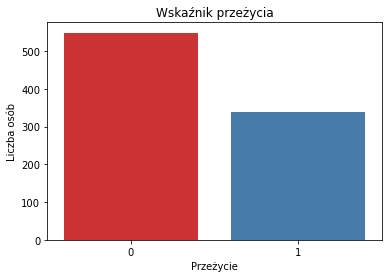

In [11]:
sns.countplot(x='Survived', data = data, palette='Set1')
plt.xlabel('Przeżycie')
plt.ylabel('Liczba osób')
plt.title('Wskaźnik przeżycia')
plt.show()

Na osi X mamy zmienną Survived informującą o tym czy pasażer przeżył katastrofe, 0 oznacza, że nie przeżył, natomiast 1 oznacza, że pasażer przeżył. Na osi Y przedstawiona została liczba wszystkich pasażerów. Można zauważyć, że katastrofy nie przeżyło ponad 500 osób, a przeżyło około 340 pasażerów.

### Płeć

Na początku weźmy pod uwagę płeć. Poniżej można znaleźć wykres przedstawiający wskaźnik przeżycia ze względu na płeć. 

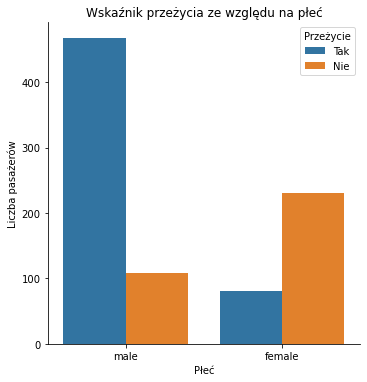

In [12]:
sns.catplot(x ="Sex", hue ="Survived", kind ="count", data = data, legend = False)
plt.title('Wskaźnik przeżycia ze względu na płeć')
plt.xlabel('Płeć')
plt.ylabel('Liczba pasażerów')
plt.legend(title='Przeżycie', labels=['Tak', 'Nie'])
plt.show()

#### Story

W przypadku analizy płci ewidentnie widać, że przeżyło dużo więcej kobiet niż mężczyzn. Prawdopodobnie stoi za tym fakt, że mężczyzni w momencie kiedy doszło do katastrofy zajęli się ratowaniem dzieci i kobiet, a dopiero później mogli ratować sami siebie.

### Wiek

Kolejnym czynnikiem, który prawdopodobnie ma wpływ na to czy dana osoba przeżyła jest wiek. Poniżej można znaleźć dwa histogramy, na pierwszym przedstawiono wiek ludzi, którym udało się przeżyć, a na drugim wiek ludzi, których nie udało się uratować.

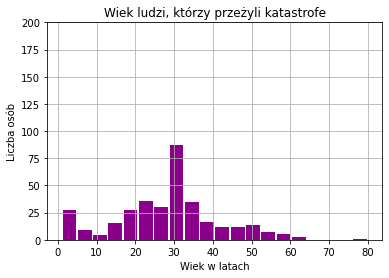

In [13]:
survived.Age.plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='darkmagenta')
plt.title('Wiek ludzi, którzy przeżyli katastrofe')
plt.xlabel('Wiek w latach')
plt.ylabel('Liczba osób')
plt.ylim(0, 200)
plt.grid(axis='y', alpha=1)

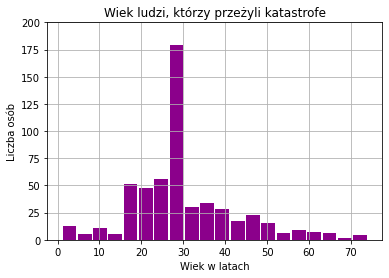

In [14]:
non_survived.Age.plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='darkmagenta')
plt.title('Wiek ludzi, którzy przeżyli katastrofe')
plt.xlabel('Wiek w latach')
plt.ylabel('Liczba osób')
plt.ylim(0, 200)
plt.grid(axis='y', alpha=1)

Na przedstawionych histogramach, na osi X przedstawiony został wiek, natomiast oś Y przedstawia liczbę osób. 

#### Story

Należy zauważyć, że współczynnik przeżycia jest największy dla dzieci do 10 roku życia, zginęło także bardzo dużo osób w wieku od 20 do 40 lat. W przypadku dzieci wniosek nasuwa się sam, wszyscy na początku katastrofy zajęli się ratowaniem dzieci, oprócz tego, miały one również wsparcie swoich rodziców. Fakt, że zginęło dużo osób w wieku od 20 do 40 roku życia pokazuje, że osoby te poza ratowaniem samego siebie musiały również pomóc innym.

### Licba współpasażerów

Kolejnym czynnikiem, który wybrałem i uważam, że może mieć wpływ na to czy dany pasażer przeżył katastrofe jest liczba współpasażerów w postaci brata/siostry, żony/męża lub rodzica/dziecka. W przygotowaniu danych, wartości ze zmiennych SibSp oraz Parch zostały zsumowane do zmiennej FamilySize, która jest teraz wykorzystywana.

/home/wojtek/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


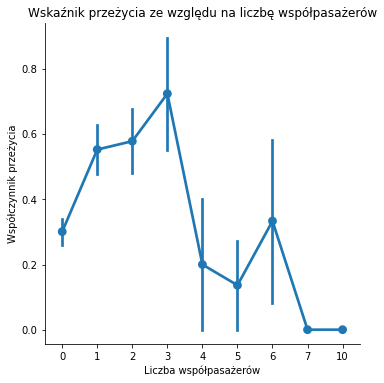

In [15]:
sns.factorplot(x ='FamilySize', y ='Survived', data = data)
plt.xlabel('Liczba współpasażerów')
plt.ylabel('Współczynnik przeżycia')
plt.title('Wskaźnik przeżycia ze względu na liczbę współpasażerów')
plt.show()

#### Story

Jak zaznaczałem wcześniej, w zmiennej FamilySize zostały zapisane informacje o liczbie współpasażerów. Najważniejsze co można powiedzieć to fakt, że jeżeli pasażer była sam to miał dużo mniejsze prawdopodobieństwo przeżycia. Pasażerowie podróżujący sami, mimo tego, że mogli się skupiać tylko na sobie to nie mieli z tego tytułu praktycznie żadnych korzyści.

### Klasa biletu

Czwartym i ostatnim czynnikiem, który może mieć wpływ na to czy pasażer przeżył katastrofe jest klasa biletu, którą posiadał.

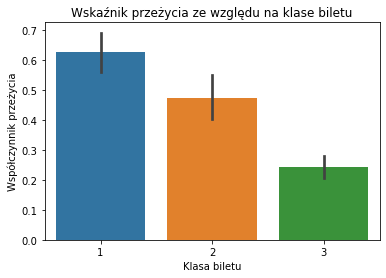

In [16]:
sns.barplot(x='Pclass', y='Survived', data=data)
plt.xlabel('Klasa biletu')
plt.ylabel('Współczynnik przeżycia')
plt.title('Wskaźnik przeżycia ze względu na klase biletu')
plt.show()

Na osi X przedstawiona została klasa biletu przyjmująca wartości od 1 do 3, gdzie 1 jest najwyższą klasą, a 3 najniższą. Oś Y przedstawia współczynik przeżycia.

#### Story

Można zauważyć, że współczynnik przeżycia dla klasy pierwszej jest prawie tak duży jak sumarycznie dla klasy drugiej i trzeciej. Wyraźnie widać, że klasa biletu przyczynia się do szansy na przeżycie osoby, zwłaszcza jeśli ta osoba jest w klasie 1.


## Podsumowanie i wnioski

Przed przystąpieniem do analizy należało zająć się zbiorem danych. Początkowo zająłem się analizą jak wygląda zbiór danych, jakie zmienne oraz jakiego typu zawiera. Następnie przygotowałem zbiór danych do analizy, m.in. zająłem się usunięciem wierszów, które zawierały brakujące dane oraz utworzyłem kilka zmiennych, które były wykorzystywane w analizie. Wybrałem również kilka zmiennych ze zbioru danych, które moim zdaniem miały wpływ na to czy pasażer przeżył katastrofe. W sekcji analizy przeanalizowałem oraz interpretowałem wykresy oparte o zmienne, o których mowa wcześniej.

Uważam, że główne czynniki, które miały wpływ na to czy pasażer przeżył katastrofe to płeć, wiek oraz klasa biletu. Zbadana została również zmienna informująca o liczbie współpasażerów danej osoby, z której wynika, że osoby, które podróżowały same miały najmniejsze szanse na przeżycie pod tym kątem. W przypadku płci widać zależność, że przeżyło dużo więcej kobiet niż mężczyzn, podobnie jest z dziećmi do 10 roku życia. Widać również zależność, że umieralność jest większa w wieku 20-40 lat co prawdopodobnie wynika z tego, że osoby w tym wieku zajmowały się głównie ratowaniem innych. Ostatnim czynnikiem, który według mnie miał wpływ na to czy danej osobie udało się przeżyć jest klasa biletu, którą posiadał. Współczynnik przeżycia jest zdecydowanie wyższy dla biletów o wyższej klasie.